<a href="https://colab.research.google.com/github/JD12321/2024-1-my-BDA/blob/main/inclass/06w_0409_B_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**

- 06주차 B반

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


# 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.6 MB/s eta 0:00:00


In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

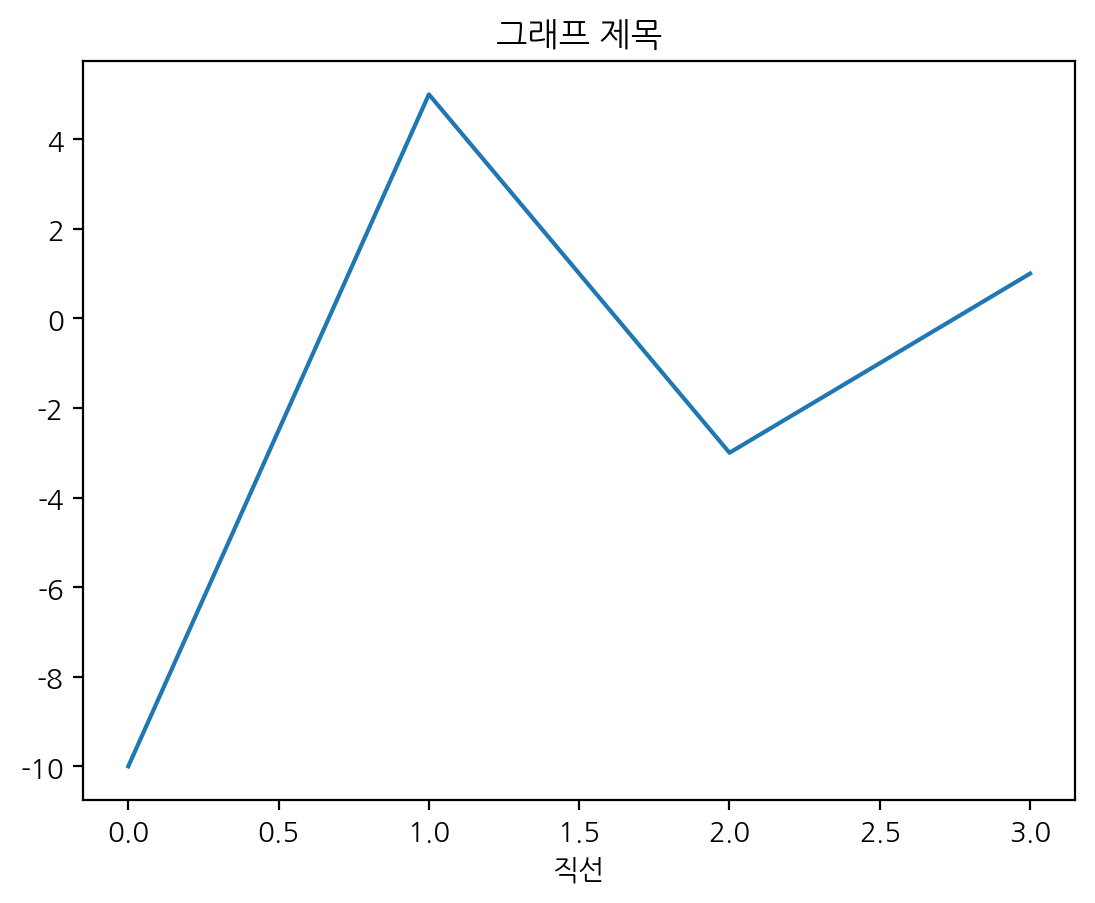

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.58 MiB/s, done.


# 07 데이터 - 빠진 데이터, 이상한 데이터 제거하기

In [ ]:
df = pd.DataFrame({'sex'    : ['M', 'F', np.nan, 'M', 'F'],
                   'score'  : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.score + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

## [== 시험 예상 ==] 결측치 확인하기

In [ ]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isnull() # == df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.notna()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [ ]:
df.notnull() # == notna()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [ ]:
df.isna().sum() # -> .sum(axis=0)

sex      1
score    1
dtype: int64

In [ ]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [ ]:
s = pd.Series([True, True, True, False])
s

0     True
1     True
2     True
3    False
dtype: bool

In [ ]:
s.sum()

3

In [ ]:
s.any()

True

In [ ]:
s.all()

False

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
# [== 시험 예상 ==]
df.isna().any(axis=0)

sex      True
score    True
dtype: bool

In [ ]:
# [== 시험 예상 ==]
b = df.isna().any(axis=1)
b

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
df[b]

,sex,score
2,NaN,3.0
4,F,NaN


In [ ]:
# [== 시험 예상 ==]
# 적어도 NaN이 하나 있는 행을 추출
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [ ]:
# [== 시험 예상 ==]
# NaN이 하나도 없는 행을 추출
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
# [== 시험 예상 ==]
# NaN이 하나도 없는 행을 추출
df[df.notna().all(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## 결측값 시각화
  - [패키지 missingno](https://github.com/ResidentMario/missingno)

In [ ]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


<Axes: >

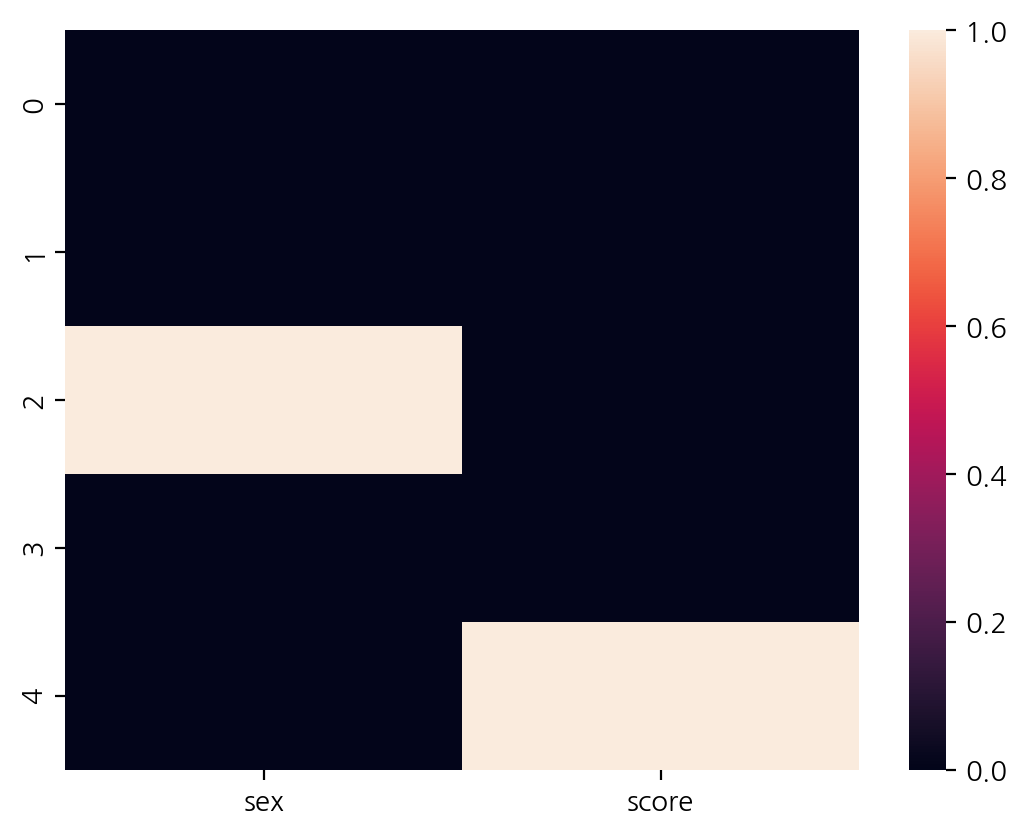

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: >

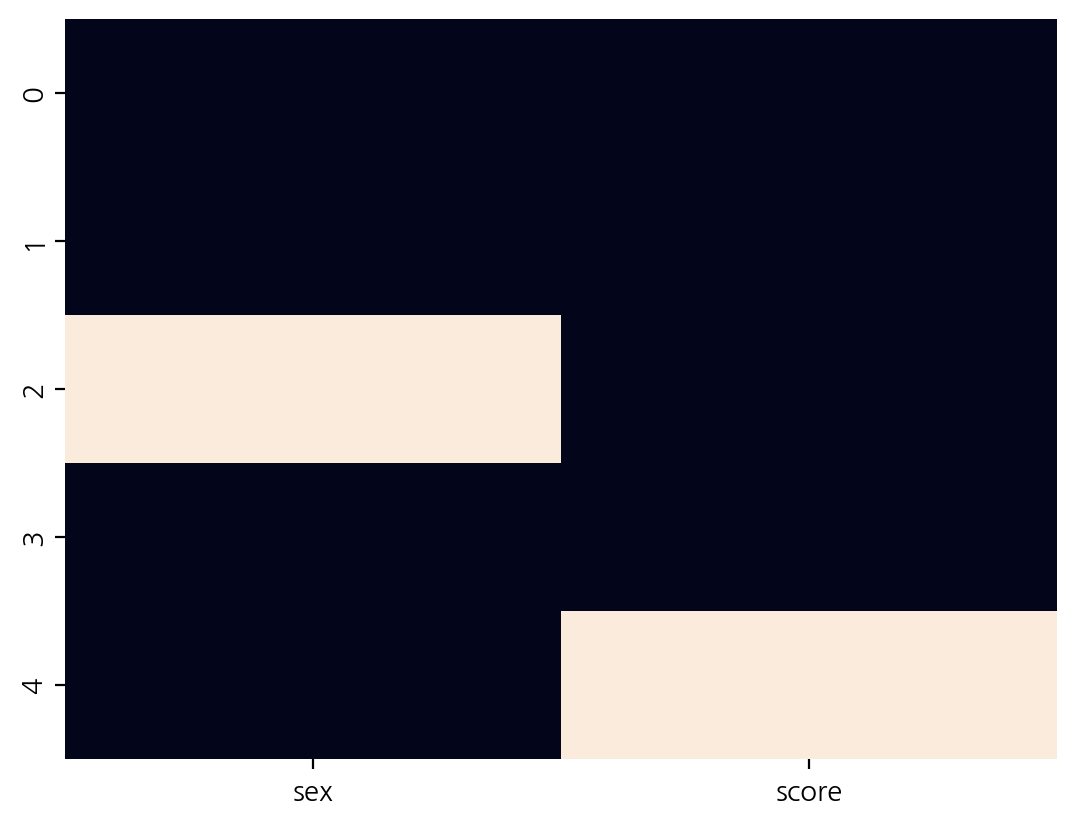

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False)

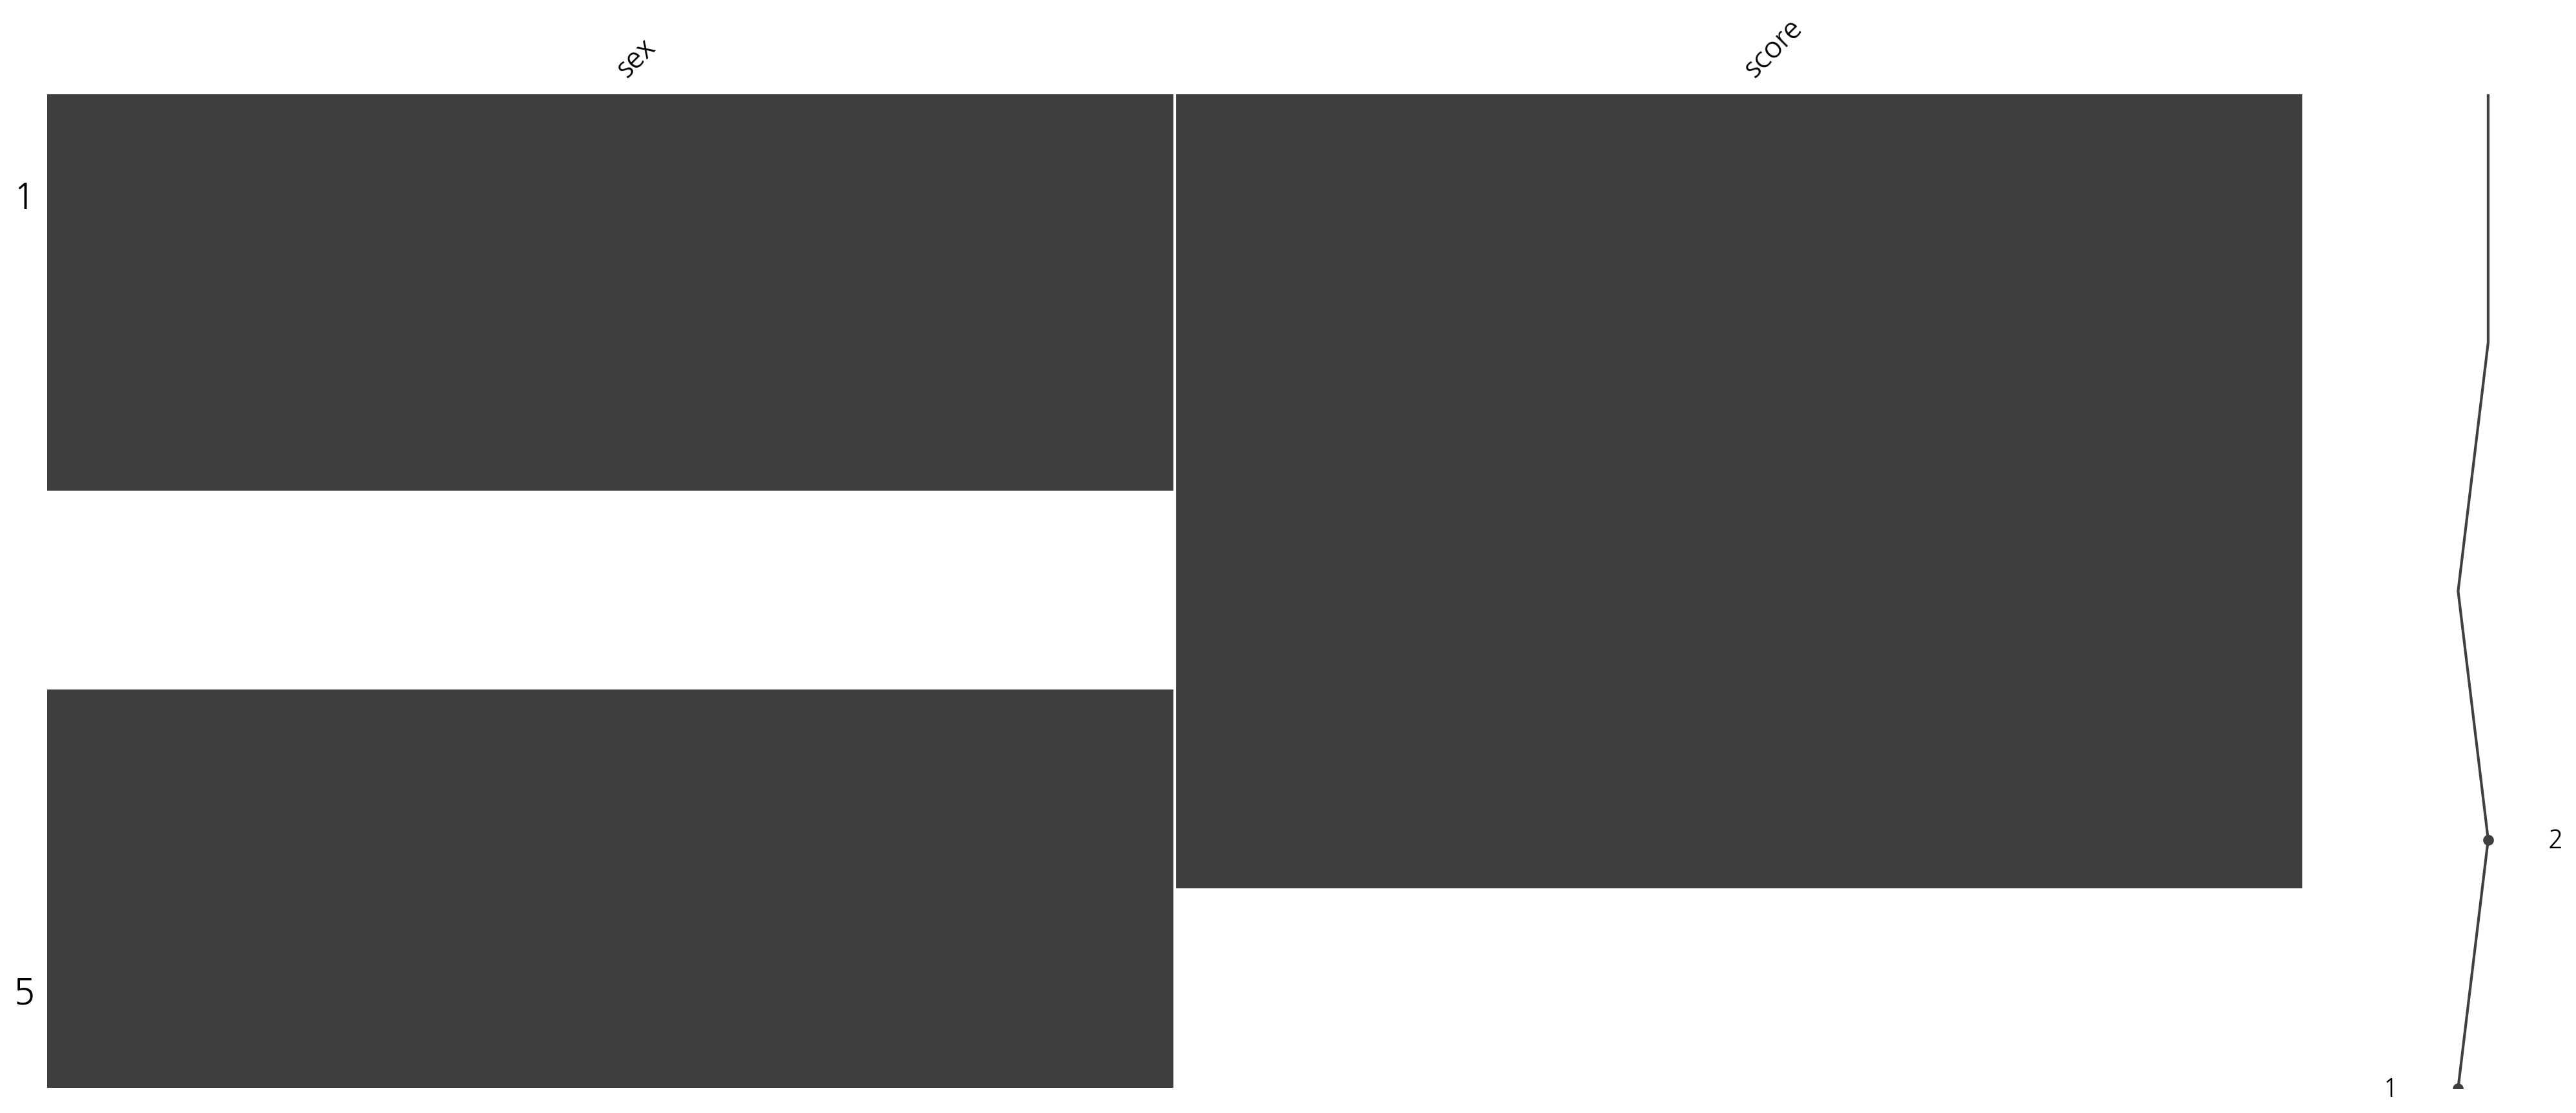

In [ ]:
import missingno as msno
msno.matrix(df);

<Axes: >

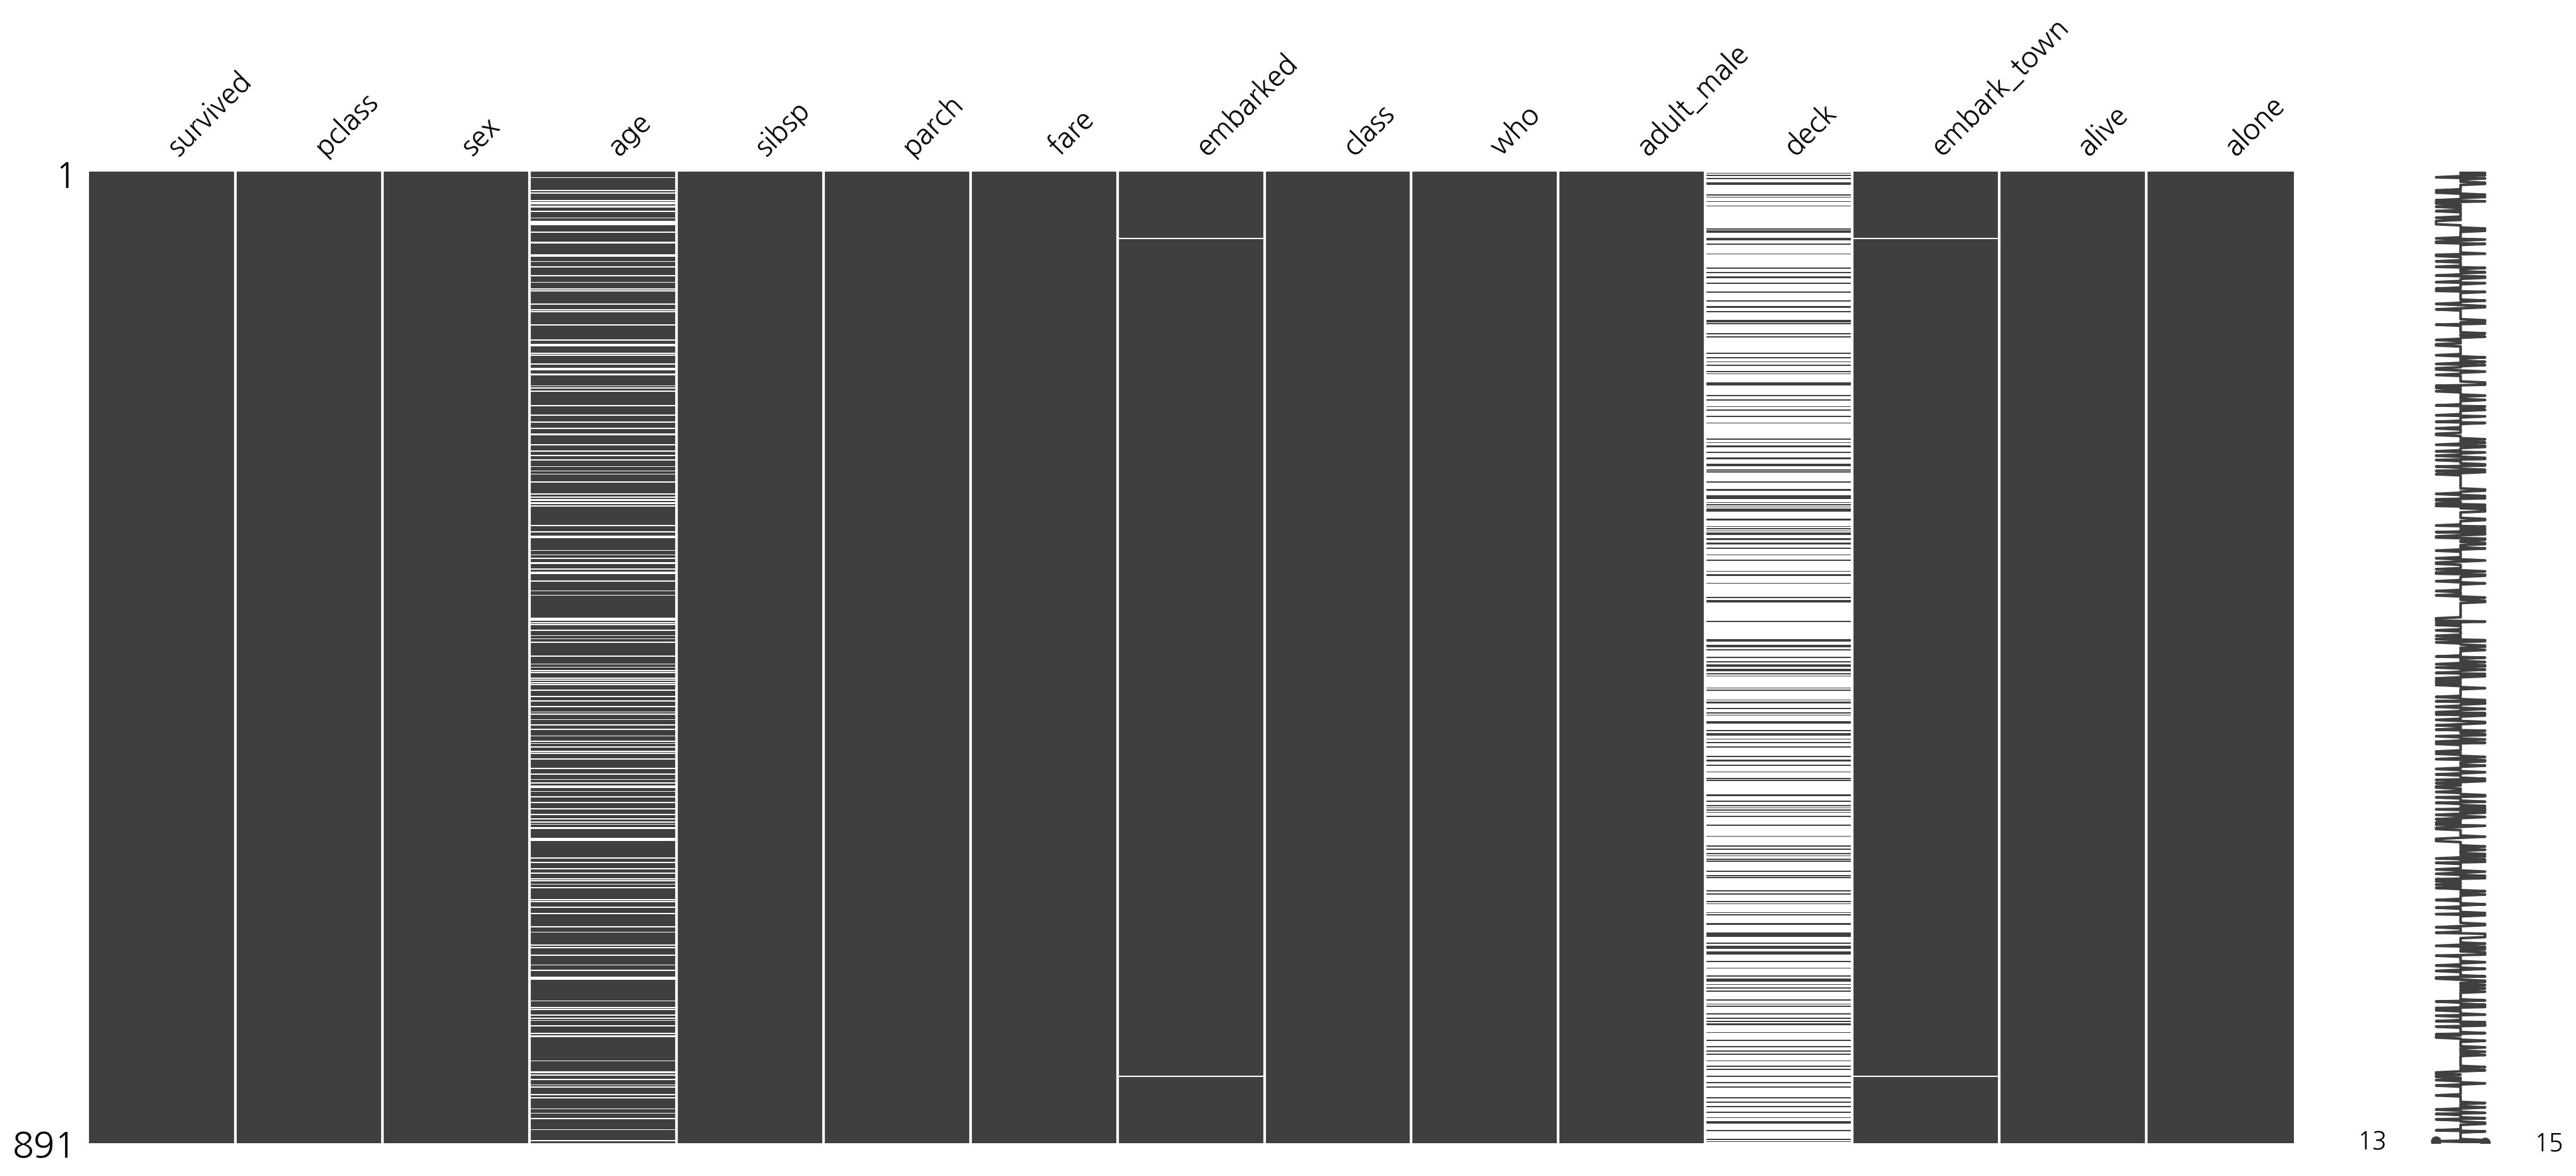

In [ ]:
tdf = sns.load_dataset('titanic')
msno.matrix(tdf)

In [ ]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
685,0,2,male,25.0,1,2,41.58,C,Second,man,True,NaN,Cherbourg,no,False
726,1,2,female,30.0,3,0,21.00,S,Second,woman,False,NaN,Southampton,yes,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
851,0,3,male,74.0,0,0,7.78,S,Third,man,True,NaN,Southampton,no,True
435,1,1,female,14.0,1,2,120.00,S,First,child,False,B,Southampton,yes,False
375,1,1,female,NaN,1,0,82.17,C,First,woman,False,NaN,Cherbourg,yes,False
857,1,1,male,51.0,0,0,26.55,S,First,man,True,E,Southampton,yes,True
753,0,3,male,23.0,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True
197,0,3,male,42.0,0,1,8.40,S,Third,man,True,NaN,Southampton,no,False
286,1,3,male,30.0,0,0,9.50,S,Third,man,True,NaN,Southampton,yes,True


<Axes: >

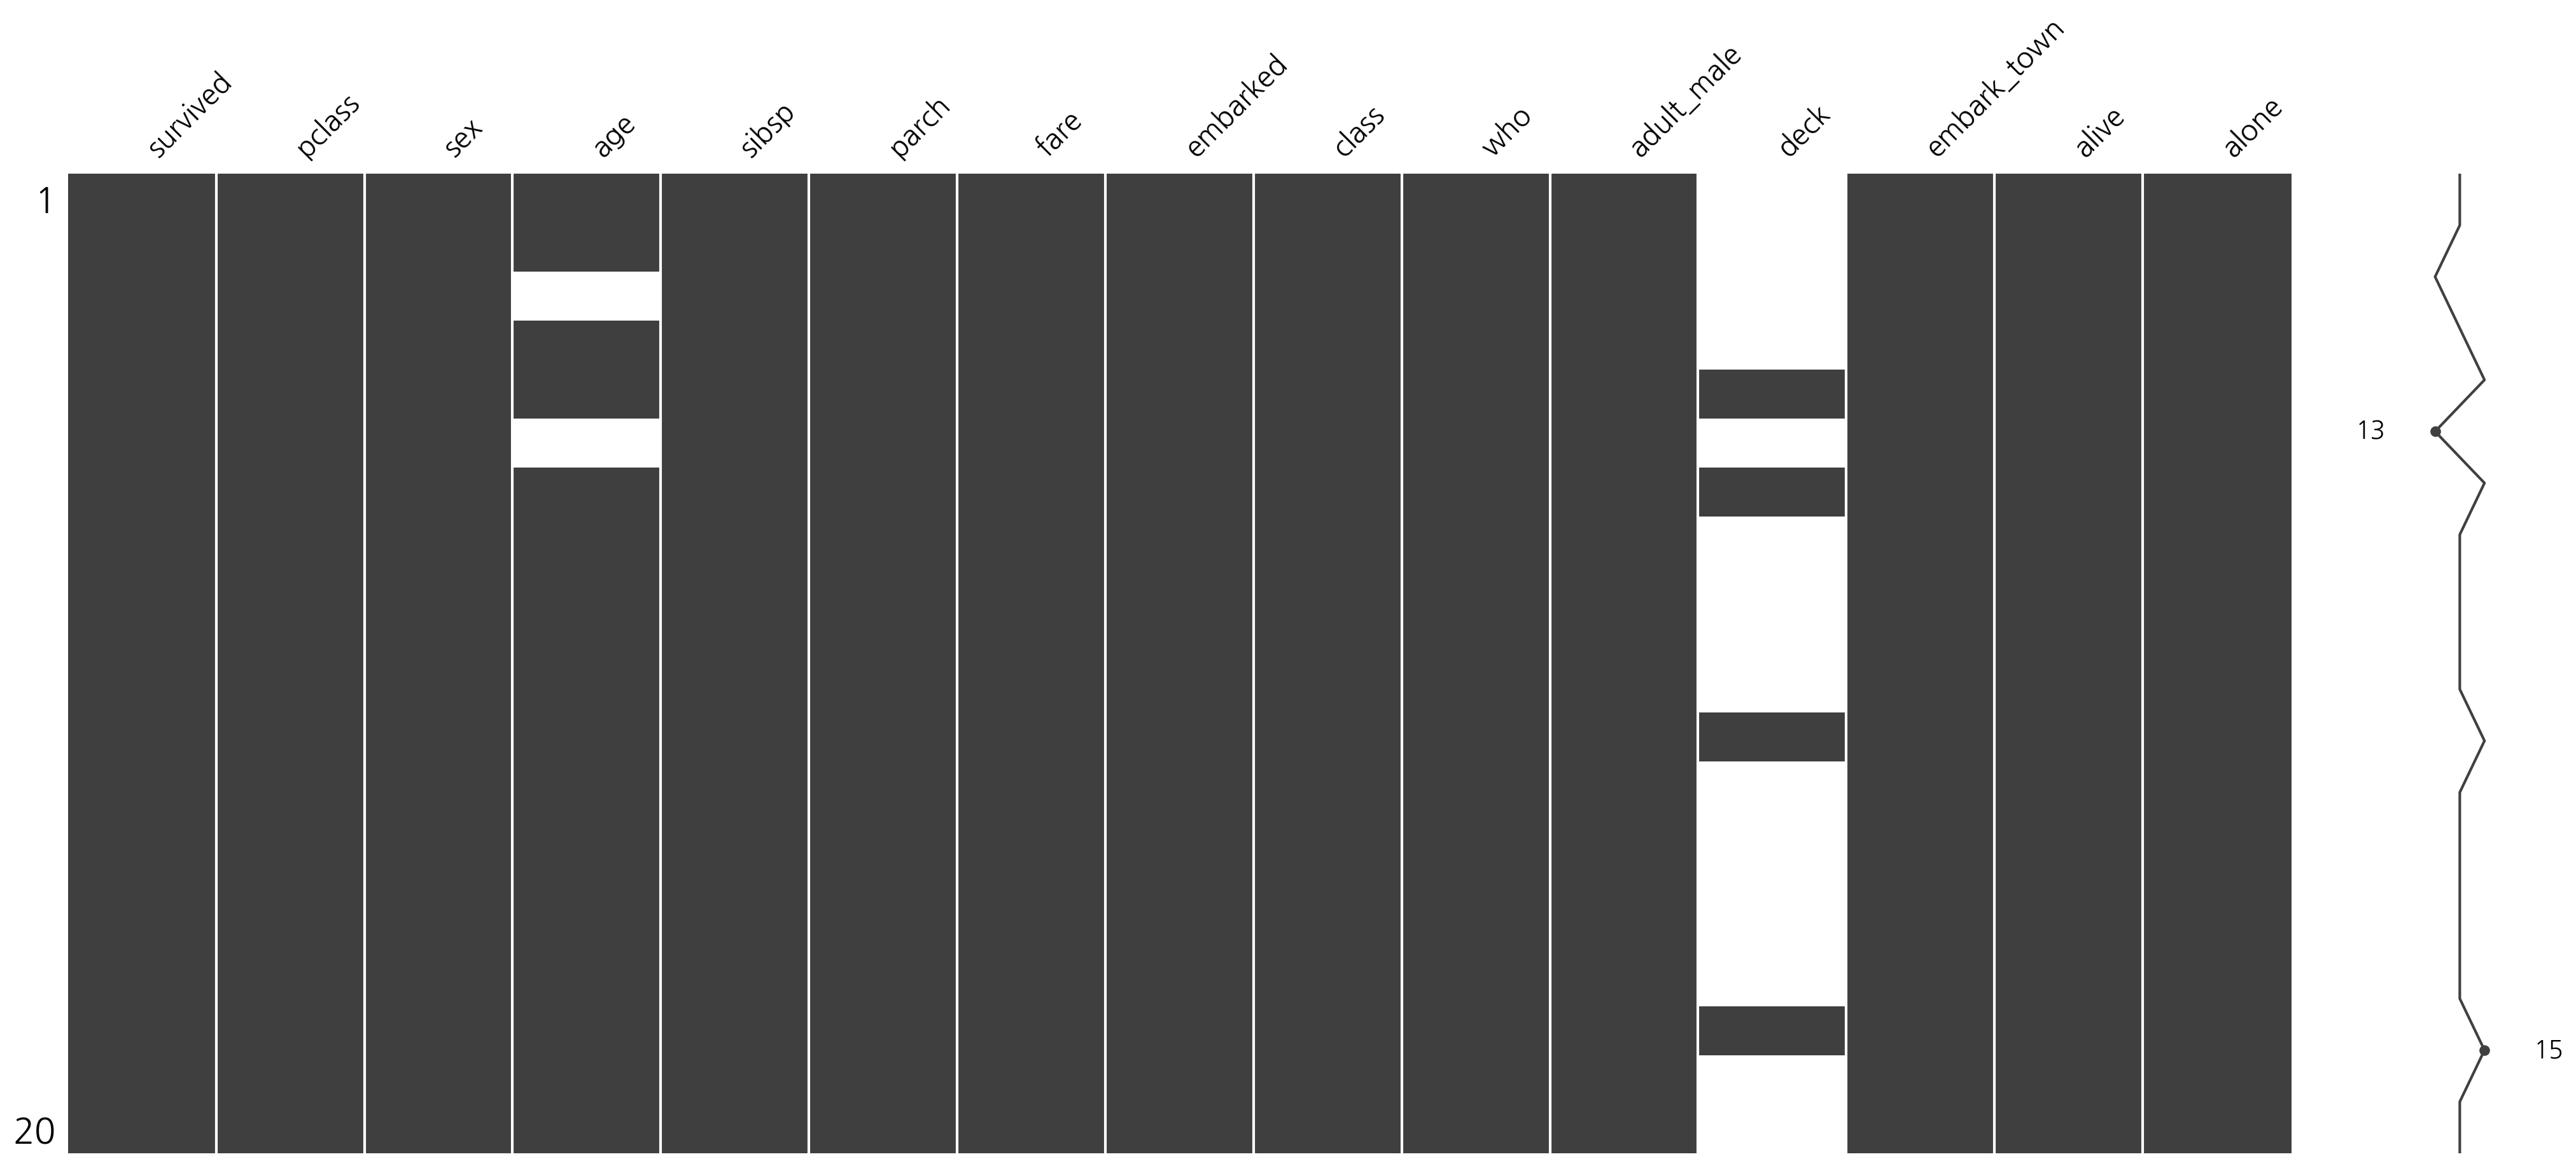

In [ ]:
msno.matrix(tdf2)

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
  - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
  - 그 점을 다음 행과 연결한 선

In [ ]:
# 열 embarked가 NaN인 행 추출
tdf[ tdf.embarked.isna() ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
# 최소한 1개의 NaN에 있는 행 추출
tdf[tdf.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


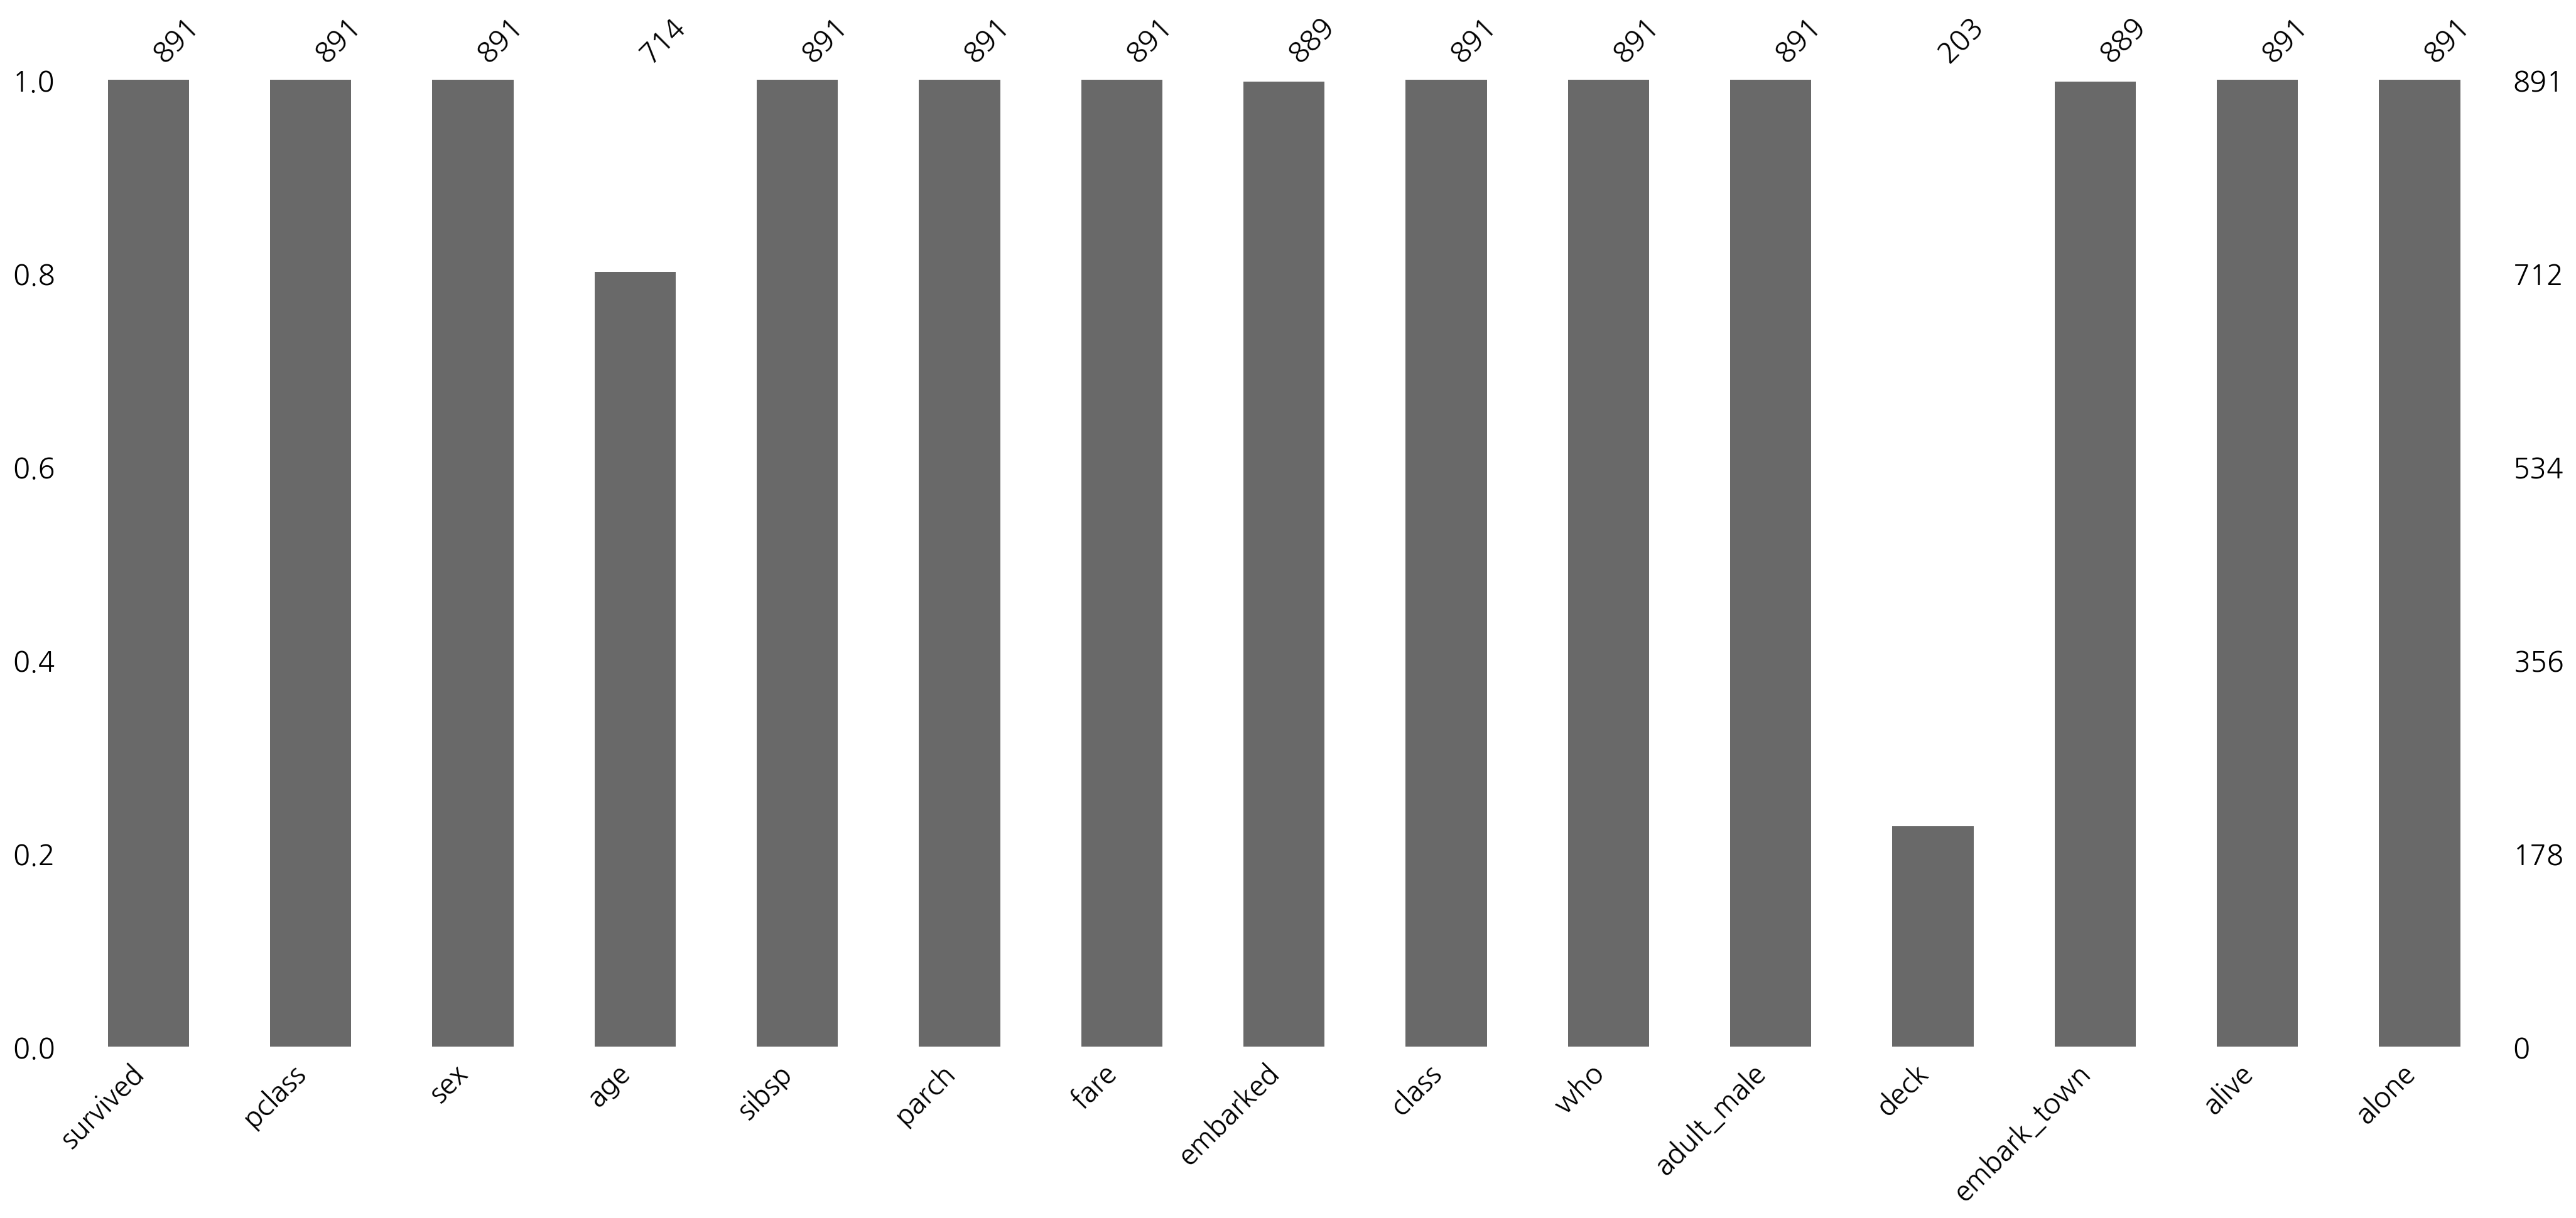

In [ ]:
msno.bar(tdf);

### 결측치 제거하기

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
df.dropna(subset=['sex'])

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [ ]:
df_nomies = df.dropna(subset = ['score']) # score 결측치 제거된 데이터 만들기
df_nomies

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [ ]:
df_nomies['score'] + 1 # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [ ]:
df.dropna(subset = ['sex'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [ ]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [ ]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.dropna(axis = 1)

""
0
1
2
3
4


In [ ]:
df.dropna(axis = 1).empty

True

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

4.0

In [ ]:
df['score'].sum() # 결측값은 제거(무시)하고 계산

16.0

In [ ]:
# 결측값은 제거(무시)하고 계산
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### pandas 문서

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [ ]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [ ]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
df.dropna(axis='columns') # 아무것도 없는 빈 데이터프레임

""
0
1
2
3


In [ ]:
# 모든 값이 NaN인 경우, 행 제거
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# 하나라도 NaN인 경우, 행 제거
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


### 결측치 대체하기

In [ ]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [ ]:
exam['math'].mean()

55.23529411764706

### 결측값 채워넣기 fillna( )

In [ ]:
exam['math'] = exam['math'].fillna(100) # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [137]:
exam['math'] = exam['math'].fillna(exam['math'].mean()) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기

In [140]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [141]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [146]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [147]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [149]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [150]:
df.dropna().groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [159]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [160]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [161]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [162]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [163]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [164]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


### 이상치 제거하기 - 극단적인 값

In [165]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [168]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
110,hyundai,sonata,2.4,2008,4,auto(l4),f,21,30,r,midsize
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater


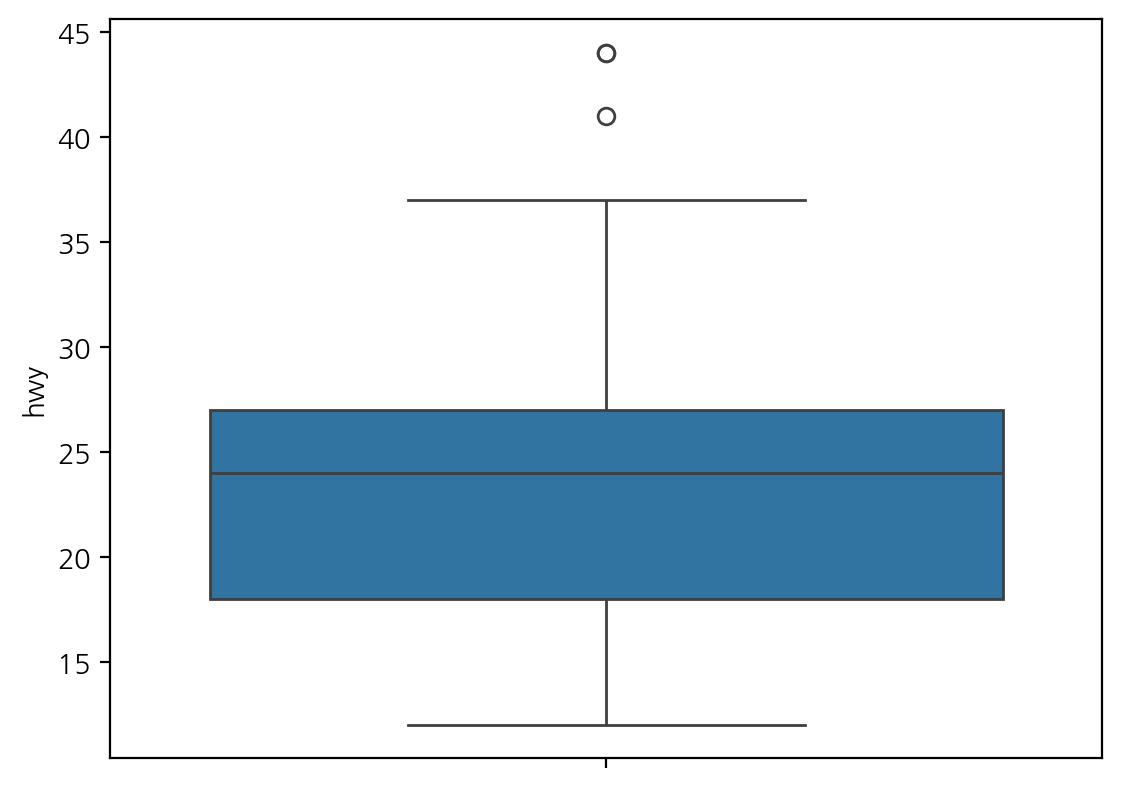

In [169]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy');

In [170]:
mpg.hwy.describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [172]:
s = pd.Series([1, 2, 3, 4, 5])

In [173]:
s.quantile([.25, .5, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [174]:
pct25, pct75 = mpg['hwy'].quantile([.25, .75])

In [175]:
pct25

18.0

In [176]:
pct75

27.0

### IQR(Interquartile range) 구하기

In [178]:
iqr = pct75 - pct25
iqr

9.0

### 하한, 상한 구하기

In [182]:
pct25 - 1.5 * iqr # 하한

4.5

In [181]:
pct75 + 1.5 * iqr # 상한

40.5

In [189]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

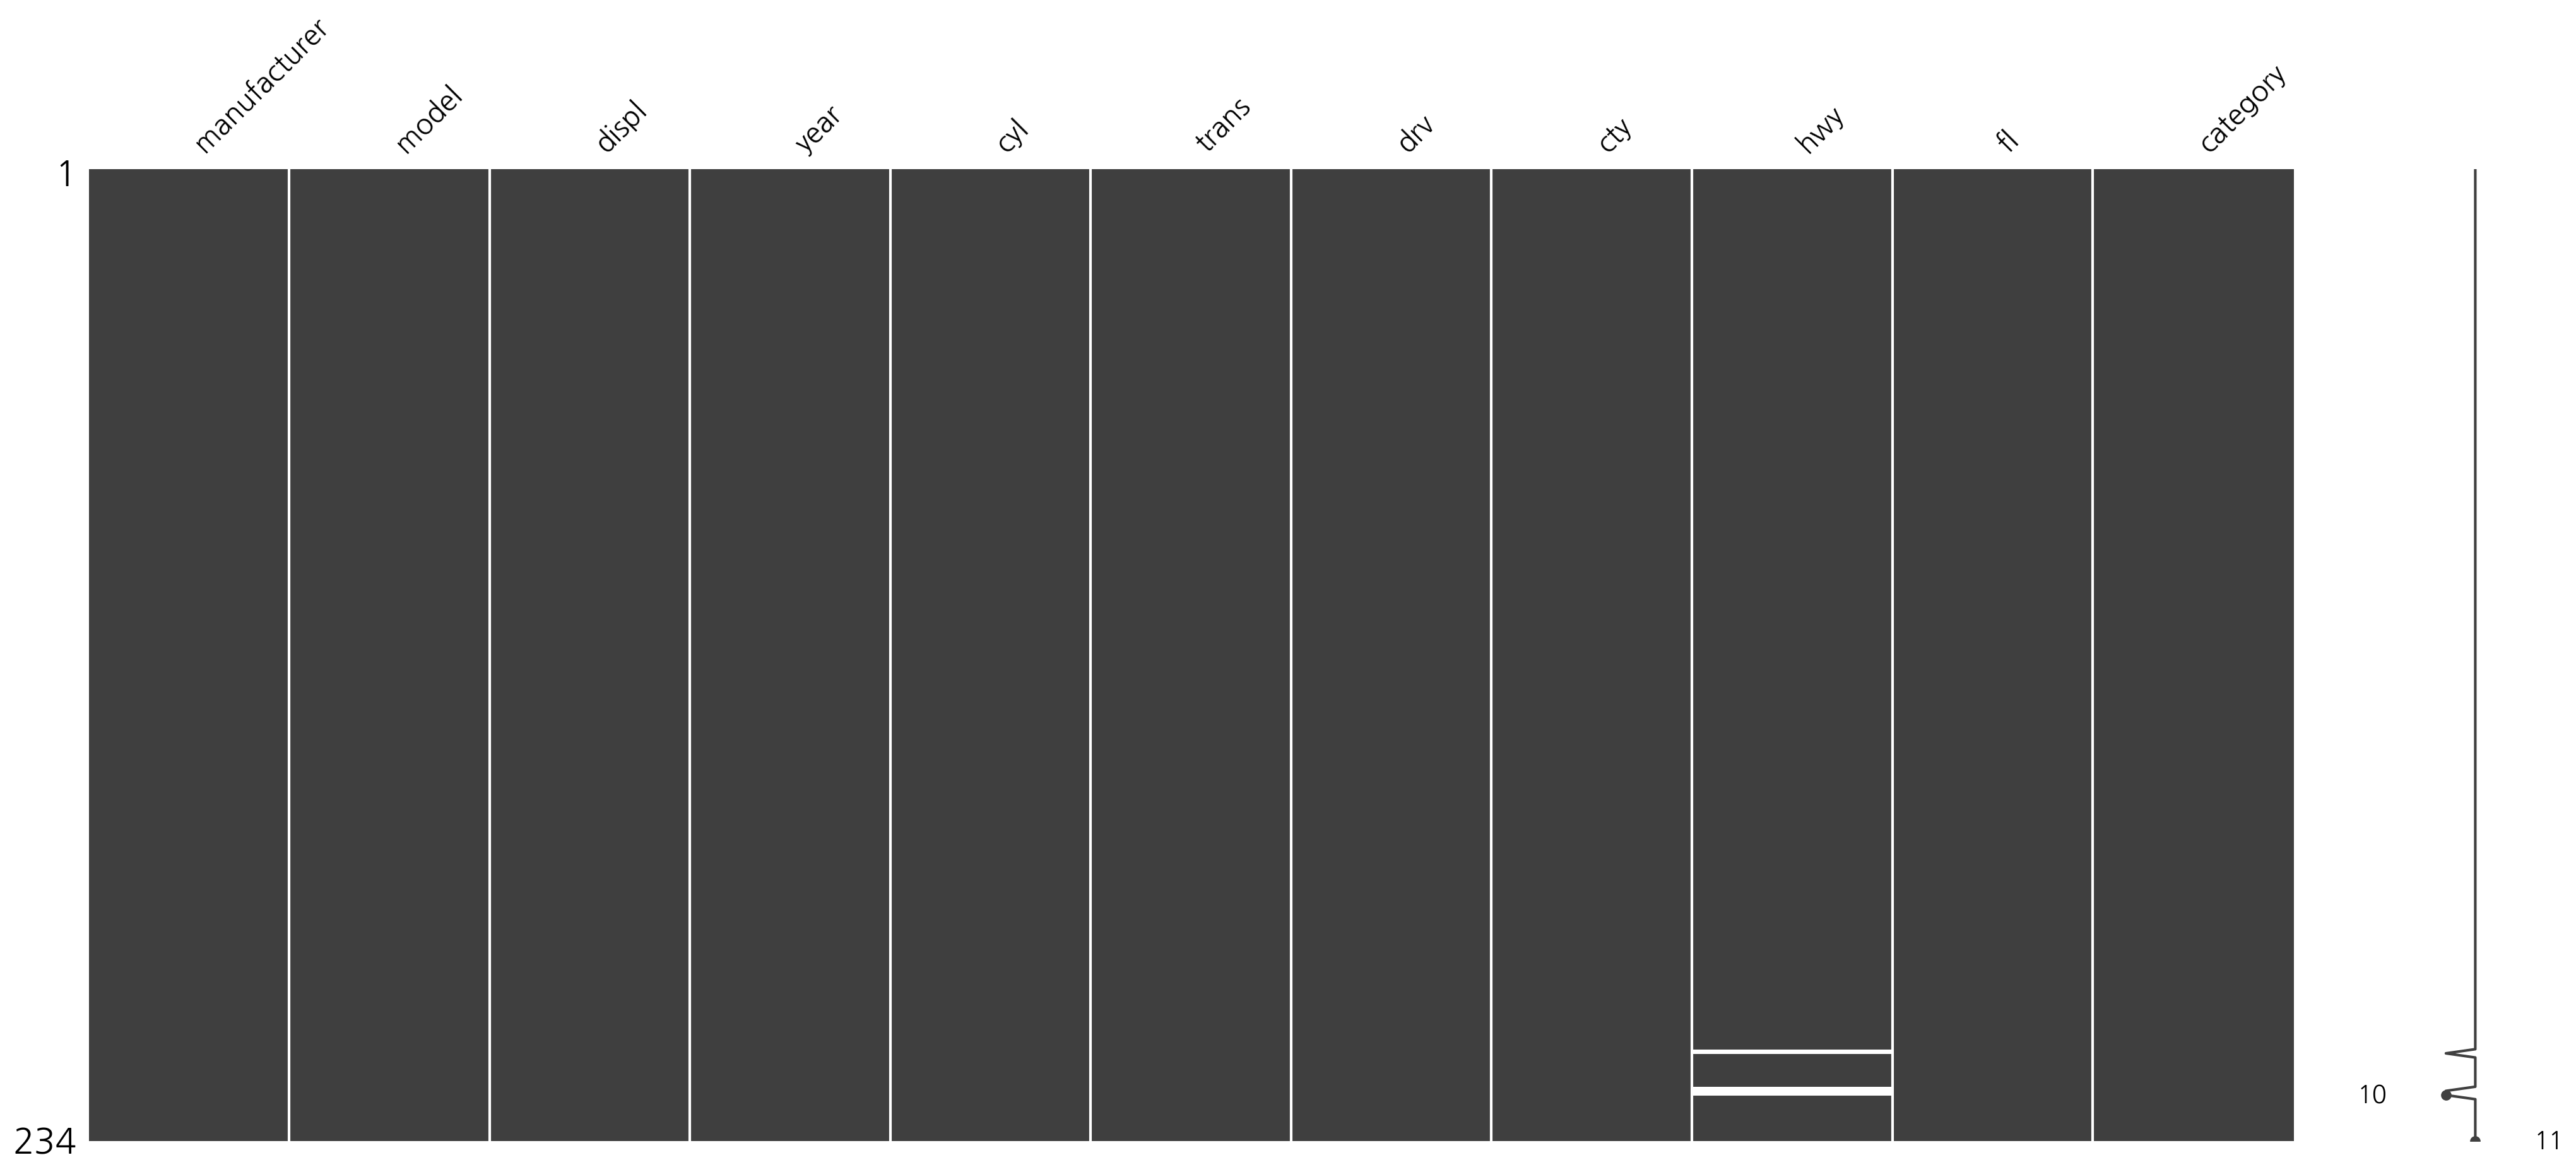

In [200]:
import missingno as msno
msno.matrix(mpg);

### 3. 이상값을 결측 처리하기

In [192]:
# 4.5 - 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [193]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [194]:
dmpg.shape[1]

11

In [197]:
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [198]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [199]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


## 정리하기

In [202]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])